In [176]:
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [177]:
class Point:
    def __init__(self, x, y, cluster):
        self.x = np.array([x, y])
        self.cluster = cluster
        self.label = None

In [178]:
def range_query(db, dist_func, q, eps):
    N = set([])
    for p in db:
        if dist_func(q, p) <= eps:
            N.add(p)
    return N    

In [179]:
def db_scan(db, dist_func, eps, min_pts):
    C = 0
    for p in tqdm(db):
        if p.label != None: continue
        N = range_query(db, dist_func, p, eps)
        if len(N) < min_pts:
            p.label = 'noise'
            continue
        C += 1
        p.label = C
        
        S = N.difference(set([p]))
        while(len(S) > 0):
            q = S.pop()
            if q.label == 'noise': q.label = C
            if q.label != None: continue
            q.label = C
            N = range_query(db, dist_func, q, eps)
            if len(N) >= min_pts:
                S = S.union(N)            

In [180]:
def euclidean(p, q):
    return np.linalg.norm(p.x - q.x)

In [184]:
def plot_clusters(db):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
    clusters = {}
    for p in db:
        clusters[p.label] = clusters.get(p.label, []) + [p]
    print(list(clusters.keys()))
    print(colors[:len(clusters)])
    for i, k in enumerate(clusters):
        xs = [p.x[0] for p in clusters[k]]
        ys = [p.x[1] for p in clusters[k]]
        plt.scatter(xs, ys, color=colors[i%len(colors)])
    plt.show()


[1, 2]
['r', 'g']


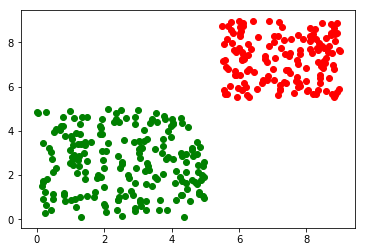

In [185]:
df = pd.read_excel('data1.xlsx')
db = np.array([Point(p[0], p[1], None) for p in df.values])
eps = 1
min_pts = 5
db_scan(db, euclidean, eps, min_pts)
plot_clusters(db)


[1, 'noise', 2, 3]
['r', 'g', 'b', 'y']


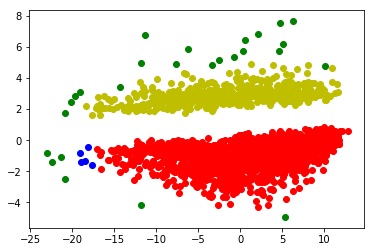

In [186]:
df = pd.read_excel('data2.xlsx')
db = np.array([Point(p[0], p[1], None) for p in df.values])
eps = 1
min_pts = 5
db_scan(db, euclidean, eps, min_pts)
plot_clusters(db)